In [879]:
import pandas as pd

X = pd.read_csv('updated_dataset.csv')

In [880]:
X

,Unnamed: 0,Stat_checking_acc,Duration_months,Credit_history,Purpose,Credit_amount,Savings_bonds,Duration_of_employment,Installment_pct_annual_income,Marital_status__and_sex,...,Property,Age,Other_plans,Housing,Num_existing_credits,Job,num_liable,Has_phone,Foreign_Worker,Class
0,0,-82.0,6,critical,radio_tv,1169,0.0,11.0,4,male,...,real_estate,67,none,rent,2,skilled,1,1,1,1
1,1,84.0,48,paid_back_duly,radio_tv,5951,55.0,1.0,2,fem,...,real_estate,22,none,rent,1,skilled,1,0,1,2
2,2,0.0,12,critical,education,2096,37.0,5.0,2,male,...,real_estate,49,none,rent,1,unskilled,2,0,1,1
3,3,-92.0,42,paid_back_duly,furniture_equipment,7882,73.0,5.0,2,male,...,life_insurance,45,none,own/free,1,skilled,2,0,1,1
4,4,-93.0,24,delayed_pay,car_new,4870,19.0,2.0,3,male,...,unknown_or_none,53,none,own/free,2,skilled,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.0,12,paid_back_duly,furniture_equipment,1736,84.0,4.0,3,fem,...,real_estate,31,none,rent,1,unskilled,1,0,1,1
996,996,-106.0,30,paid_back_duly,car_used,3857,39.0,3.0,4,male,...,life_insurance,40,none,rent,1,skilled,1,1,1,1
997,997,1.0,12,paid_back_duly,radio_tv,804,62.0,15.0,4,male,...,car_or_other,38,none,rent,1,skilled,1,0,1,1
998,998,-111.0,45,paid_back_duly,radio_tv,1845,61.0,2.0,4,male,...,unknown_or_none,23,none,own/free,1,skilled,1,1,1,2


#SQL findings

Job, Housing, Phone ownership, and age seem to play a significant role in credit rating at first glance. Let's see if they play a significant role in determining the debtor's demographics.

We could also add marital status and sex, and purpose.

We are avoiding any feature that indicate credit or credit history, or whether they are a good or bad debtor, since we don't want those factors to skew the geography, as they are our "testing" features to compare geodraphy with socioeconomic status.

In [881]:
ALL_FEATURES = X.columns
ALL_FEATURES

Index(['Unnamed: 0', 'Stat_checking_acc', 'Duration_months', 'Credit_history',
       'Purpose', 'Credit_amount', 'Savings_bonds', 'Duration_of_employment',
       'Installment_pct_annual_income', 'Marital_status__and_sex',
       'Other_debtors', 'Resident_since', 'Property', 'Age', 'Other_plans',
       'Housing', 'Num_existing_credits', 'Job', 'num_liable', 'Has_phone',
       'Foreign_Worker', 'Class'],
      dtype='object')

In [882]:
demographic_FEATURES = ['Housing', 'Has_phone', 'Age', 'Marital_status__and_sex', 'Duration_of_employment', 'Stat_checking_acc', 'Savings_bonds', 'Purpose', 'Credit_history']



SOCIOECOINOMIC_FEATURES = ['Duration_months', 'Credit_amount', 'Num_existing_credits', 'Class', 'dem_cluster']

In [883]:
X_demographic = X[demographic_FEATURES]
X_demographic

,Housing,Has_phone,Age,Marital_status__and_sex,Duration_of_employment,Stat_checking_acc,Savings_bonds,Purpose,Credit_history
0,rent,1,67,male,11.0,-82.0,0.0,radio_tv,critical
1,rent,0,22,fem,1.0,84.0,55.0,radio_tv,paid_back_duly
2,rent,0,49,male,5.0,0.0,37.0,education,critical
3,own/free,0,45,male,5.0,-92.0,73.0,furniture_equipment,paid_back_duly
4,own/free,0,53,male,2.0,-93.0,19.0,car_new,delayed_pay
...,...,...,...,...,...,...,...,...,...
995,rent,0,31,fem,4.0,0.0,84.0,furniture_equipment,paid_back_duly
996,rent,1,40,male,3.0,-106.0,39.0,car_used,paid_back_duly
997,rent,0,38,male,15.0,1.0,62.0,radio_tv,paid_back_duly
998,own/free,1,23,male,2.0,-111.0,61.0,radio_tv,paid_back_duly


In [884]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [885]:
cat_features = ['Credit_history']
num_features = ['Savings_bonds', 'Age', 'Duration_of_employment', 'Stat_checking_acc', 'Savings_bonds']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
])

pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])

pipeline.fit(X_demographic)
X['dem_cluster'] = pipeline['kmeans'].labels_

In [886]:
X

,Unnamed: 0,Stat_checking_acc,Duration_months,Credit_history,Purpose,Credit_amount,Savings_bonds,Duration_of_employment,Installment_pct_annual_income,Marital_status__and_sex,...,Age,Other_plans,Housing,Num_existing_credits,Job,num_liable,Has_phone,Foreign_Worker,Class,dem_cluster
0,0,-82.0,6,critical,radio_tv,1169,0.0,11.0,4,male,...,67,none,rent,2,skilled,1,1,1,1,2
1,1,84.0,48,paid_back_duly,radio_tv,5951,55.0,1.0,2,fem,...,22,none,rent,1,skilled,1,0,1,2,1
2,2,0.0,12,critical,education,2096,37.0,5.0,2,male,...,49,none,rent,1,unskilled,2,0,1,1,2
3,3,-92.0,42,paid_back_duly,furniture_equipment,7882,73.0,5.0,2,male,...,45,none,own/free,1,skilled,2,0,1,1,2
4,4,-93.0,24,delayed_pay,car_new,4870,19.0,2.0,3,male,...,53,none,own/free,2,skilled,2,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.0,12,paid_back_duly,furniture_equipment,1736,84.0,4.0,3,fem,...,31,none,rent,1,unskilled,1,0,1,1,1
996,996,-106.0,30,paid_back_duly,car_used,3857,39.0,3.0,4,male,...,40,none,rent,1,skilled,1,1,1,1,1
997,997,1.0,12,paid_back_duly,radio_tv,804,62.0,15.0,4,male,...,38,none,rent,1,skilled,1,0,1,1,2
998,998,-111.0,45,paid_back_duly,radio_tv,1845,61.0,2.0,4,male,...,23,none,own/free,1,skilled,1,1,1,2,1


In [887]:
X[SOCIOECOINOMIC_FEATURES]

,Duration_months,Credit_amount,Num_existing_credits,Class,dem_cluster
0,6,1169,2,1,2
1,48,5951,1,2,1
2,12,2096,1,1,2
3,42,7882,1,1,2
4,24,4870,2,2,2
...,...,...,...,...,...
995,12,1736,1,1,1
996,30,3857,1,1,1
997,12,804,1,1,2
998,45,1845,1,2,1


In [888]:
import numpy as np

cluster_centers = pipeline.named_steps['kmeans'].cluster_centers_
feature_names = pipeline.named_steps['preprocess'].get_feature_names_out()

# Turn into a DataFrame
centroids_df = pd.DataFrame(cluster_centers, columns=feature_names)
centroids_df = centroids_df.round(3)
centroids_df

,num__Savings_bonds,num__Age,num__Duration_of_employment,num__Stat_checking_acc,num__Savings_bonds,cat__Credit_history_critical,cat__Credit_history_delayed_pay,cat__Credit_history_paid_back_duly
0,-0.217,0.139,-0.003,3.305,-0.217,0.298,0.035,0.667
1,-0.217,-0.416,-0.545,-0.217,-0.217,0.230,0.100,0.670
2,-0.208,0.855,1.166,-0.214,-0.208,0.406,0.074,0.519
3,4.343,0.105,0.094,0.116,4.343,0.426,0.085,0.489


In [889]:
X_transformed = pipeline.named_steps['preprocess'].transform(X_geographic)
labels = pipeline.named_steps['kmeans'].labels_

sil_score = silhouette_score(X_transformed, labels)
sil_score


np.float64(0.36816172625381965)

<Axes: title={'center': 'Cluster Centroids'}>

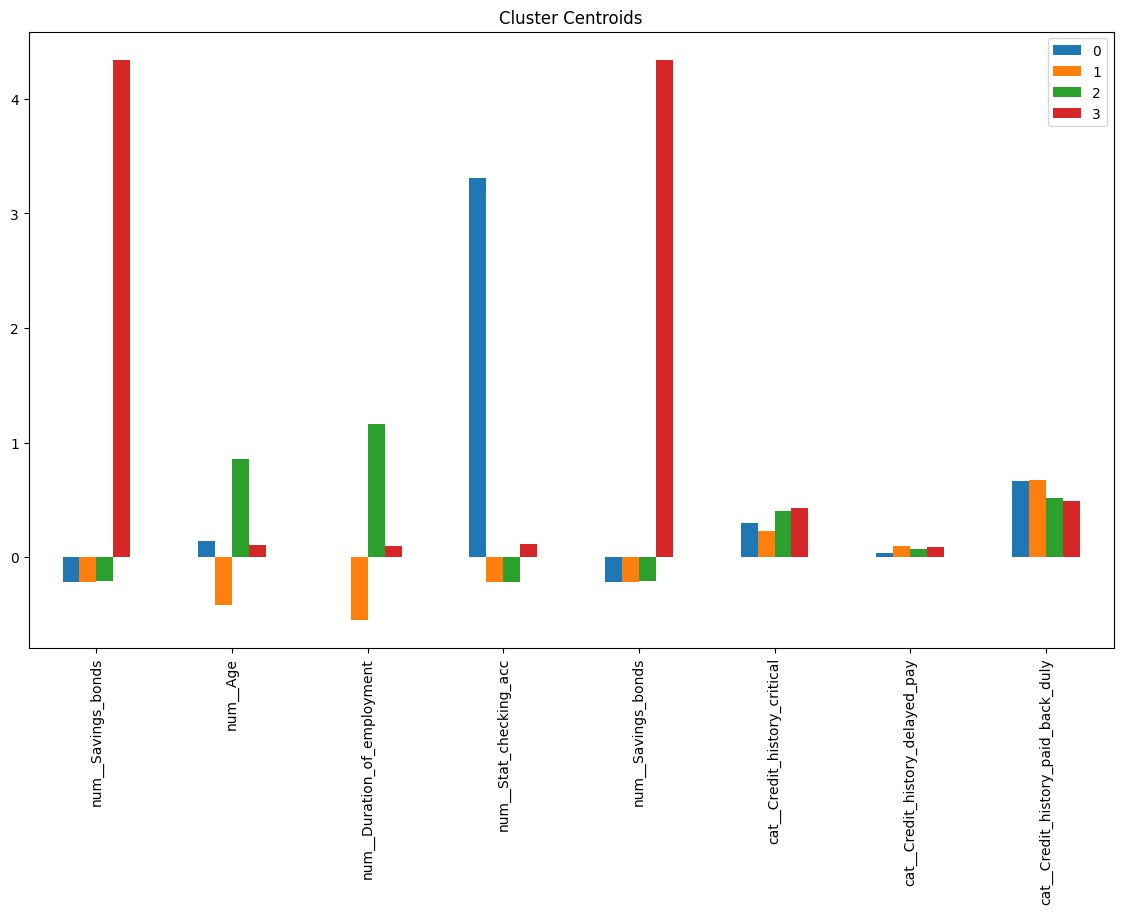

In [890]:
centroids_df.T.plot(kind='bar', figsize=(14, 8), title="Cluster Centroids")

Cluster A: Stable Middle-Class Repayers

    High checking account values (very strong financial access)

    Slightly above-average age, average employment

    Strong credit history: Most pay back duly

    → Solid credit candidates with stable cash flow

Cluster B: Young & Unstable

    Lower age and shortest employment

    Low financial assets (savings + checking)

    Slight increase in delayed payments, but still majority pay on time

    → Riskier group, potentially early in career or low financial literacy

Cluster C: Older & Tenured, But Possibly Stretched

    Oldest and longest employed cluster

    Still has low financial assets

    Moderate rate of "critical" credit history, lower on paying back duly

    → May represent overleveraged long-term workers or retirees with tighter budgets

Cluster D: Wealthy and Responsible

    Extremely high savings bond ownership

    Average demographics in other categories

    Highest rates of "critical" credit history, but still decent repayment

    → Possibly wealthy individuals with complex credit activity but low risk overall

In [891]:
cluster_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}  # Adjust as needed
X['dem_cluster'] = X['dem_cluster'].map(cluster_map)

In [892]:
X

,Unnamed: 0,Stat_checking_acc,Duration_months,Credit_history,Purpose,Credit_amount,Savings_bonds,Duration_of_employment,Installment_pct_annual_income,Marital_status__and_sex,...,Age,Other_plans,Housing,Num_existing_credits,Job,num_liable,Has_phone,Foreign_Worker,Class,dem_cluster
0,0,-82.0,6,critical,radio_tv,1169,0.0,11.0,4,male,...,67,none,rent,2,skilled,1,1,1,1,C
1,1,84.0,48,paid_back_duly,radio_tv,5951,55.0,1.0,2,fem,...,22,none,rent,1,skilled,1,0,1,2,B
2,2,0.0,12,critical,education,2096,37.0,5.0,2,male,...,49,none,rent,1,unskilled,2,0,1,1,C
3,3,-92.0,42,paid_back_duly,furniture_equipment,7882,73.0,5.0,2,male,...,45,none,own/free,1,skilled,2,0,1,1,C
4,4,-93.0,24,delayed_pay,car_new,4870,19.0,2.0,3,male,...,53,none,own/free,2,skilled,2,0,1,2,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.0,12,paid_back_duly,furniture_equipment,1736,84.0,4.0,3,fem,...,31,none,rent,1,unskilled,1,0,1,1,B
996,996,-106.0,30,paid_back_duly,car_used,3857,39.0,3.0,4,male,...,40,none,rent,1,skilled,1,1,1,1,B
997,997,1.0,12,paid_back_duly,radio_tv,804,62.0,15.0,4,male,...,38,none,rent,1,skilled,1,0,1,1,C
998,998,-111.0,45,paid_back_duly,radio_tv,1845,61.0,2.0,4,male,...,23,none,own/free,1,skilled,1,1,1,2,B


In [893]:
#checking if DEMOGRAPHIC status correlates with Good_bad

geo_good_bad = X.groupby('dem_cluster')['Class'].value_counts(normalize=True).unstack().fillna(0)
geo_good_bad

Class,1,2
dem_cluster,,
A,0.771930,0.228070
B,0.658497,0.341503
C,0.746479,0.253521
D,0.872340,0.127660


Despite expectations, rural and suburban applicants show slightly better credits rating. 

We could speculate:
1. Since the "rural" cluster tends to be of older age, they may be more experienced and financially literate. 
2. Due to having a higher amount of free housing, and the general cost of living in urban areas, lower socioeconomic status may be offset by family/community assistance, which may result in better credit.



In [894]:
X_car = X[X['Purpose'].isin(['car_new', 'car_used'])]

X_car

,Unnamed: 0,Stat_checking_acc,Duration_months,Credit_history,Purpose,Credit_amount,Savings_bonds,Duration_of_employment,Installment_pct_annual_income,Marital_status__and_sex,...,Age,Other_plans,Housing,Num_existing_credits,Job,num_liable,Has_phone,Foreign_Worker,Class,dem_cluster
4,4,-93.0,24,delayed_pay,car_new,4870,19.0,2.0,3,male,...,53,none,own/free,2,skilled,2,0,1,2,C
7,7,87.0,36,paid_back_duly,car_used,6948,54.0,1.0,2,male,...,35,none,own/free,1,skilled,1,1,1,1,B
9,9,126.0,30,critical,car_new,5234,76.0,0.0,4,male,...,28,none,rent,2,skilled,1,0,1,2,B
10,10,55.0,12,paid_back_duly,car_new,1295,54.0,0.0,3,fem,...,25,none,own/free,1,skilled,1,0,1,2,B
13,13,-117.0,24,critical,car_new,1199,46.0,10.0,4,male,...,60,none,rent,2,unskilled,1,0,1,2,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,983,-113.0,36,paid_back_duly,car_used,8229,62.0,3.0,2,male,...,26,none,rent,1,skilled,2,0,1,2,B
988,988,-86.0,24,paid_back_duly,car_used,6579,54.0,0.0,4,male,...,29,none,own/free,1,skilled,1,1,1,1,B
994,994,0.0,12,paid_back_duly,car_new,2390,0.0,9.0,4,male,...,50,none,rent,1,skilled,1,1,1,1,C
996,996,-106.0,30,paid_back_duly,car_used,3857,39.0,3.0,4,male,...,40,none,rent,1,skilled,1,1,1,1,B


In [895]:
geo_good_bad_car = X_car.groupby('dem_cluster')['Class'].value_counts(normalize=True).unstack().fillna(0)
geo_good_bad_car

Class,1,2
dem_cluster,,
A,0.764706,0.235294
B,0.656566,0.343434
C,0.673077,0.326923
D,1.000000,0.000000


Cluster D

    Highest % of good loans (87.2%)

    From earlier: very high savings bonds, modest age/employment, average repayment markers


Cluster B

    Highest % of bad loans (34.2%)

    From earlier: low age, low employment, low financials, average repayment


Cluster A & C

    In-between behavior (A: 77% good, C: 74%)

    Cluster C had older, long-employed, but possibly financially stretched

    Cluster A had high checking balances, average demographics, and strong repayment

    A is slightly stronger due to better checking balance & repayment record.

    C is older/longer employed but maybe less consistent.

In [896]:
purpose_geography = X.groupby('Purpose')['dem_cluster'].value_counts(normalize=True).unstack().fillna(0)
purpose_geography

dem_cluster,A,B,C,D
Purpose,,,,
business,0.030928,0.639175,0.268041,0.061856
car_new,0.064103,0.611111,0.277778,0.047009
car_used,0.019417,0.533981,0.378641,0.067961
domestic_appliances,0.083333,0.833333,0.083333,0.000000
education,0.080000,0.540000,0.340000,0.040000
furniture_equipment,0.055249,0.685083,0.204420,0.055249
others,0.000000,0.666667,0.333333,0.000000
radio_tv,0.078571,0.585714,0.303571,0.032143
repairs,0.000000,0.636364,0.272727,0.090909


In [897]:
# Calculate silhouette score for car subset
X_transformed_car = pipeline.named_steps['preprocess'].transform(X_car)
labels_car = pipeline.named_steps['kmeans'].labels_[X_car.index]

sil_score_car = silhouette_score(X_transformed_car, labels_car)
sil_score_car


np.float64(0.36558423040149884)

Still, with the car subset, good_bad seems to be worse across the board, especially with the urban cluster. This was a fascinating which means I cannot reject the null hypothesis.
(Geographic status has little or no correlation with bad car debt) 

Perhaps the data is simply not good enough to determine geography accurately, may not at all. Or:
1. I may have needed to add or remove existing features for better clustering.
2. Use another method of unsupervised learning, along with Principal Component Analysis (PCA).

In [898]:
X

,Unnamed: 0,Stat_checking_acc,Duration_months,Credit_history,Purpose,Credit_amount,Savings_bonds,Duration_of_employment,Installment_pct_annual_income,Marital_status__and_sex,...,Age,Other_plans,Housing,Num_existing_credits,Job,num_liable,Has_phone,Foreign_Worker,Class,dem_cluster
0,0,-82.0,6,critical,radio_tv,1169,0.0,11.0,4,male,...,67,none,rent,2,skilled,1,1,1,1,C
1,1,84.0,48,paid_back_duly,radio_tv,5951,55.0,1.0,2,fem,...,22,none,rent,1,skilled,1,0,1,2,B
2,2,0.0,12,critical,education,2096,37.0,5.0,2,male,...,49,none,rent,1,unskilled,2,0,1,1,C
3,3,-92.0,42,paid_back_duly,furniture_equipment,7882,73.0,5.0,2,male,...,45,none,own/free,1,skilled,2,0,1,1,C
4,4,-93.0,24,delayed_pay,car_new,4870,19.0,2.0,3,male,...,53,none,own/free,2,skilled,2,0,1,2,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.0,12,paid_back_duly,furniture_equipment,1736,84.0,4.0,3,fem,...,31,none,rent,1,unskilled,1,0,1,1,B
996,996,-106.0,30,paid_back_duly,car_used,3857,39.0,3.0,4,male,...,40,none,rent,1,skilled,1,1,1,1,B
997,997,1.0,12,paid_back_duly,radio_tv,804,62.0,15.0,4,male,...,38,none,rent,1,skilled,1,0,1,1,C
998,998,-111.0,45,paid_back_duly,radio_tv,1845,61.0,2.0,4,male,...,23,none,own/free,1,skilled,1,1,1,2,B


In [899]:
X.to_csv('updated_dataset_with_demographic_clusters.csv', index=False)